**Obrada informacija**: Prva laboratorijska vježba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Rijeke imaju veliki gospodarski značaj, od termoelektrana i nuklearnih elektrana kojima su rijeke nužne za rad, javne vodoopskrbe do poljoprivrede i transporta. Premda ljudi danas uvelike upravljaju vodotocima, uslijed vremenskih prilika ipak može doći do poplava, erozija tla i sličnih prirodnih nepogoda. Kako bismo se mogli na vrijeme pripremiti za potencijalne probleme, potrebno je istražiti ponašanje rijeka na temelju višegodišnjih praćenja vodostaja. U ovoj laboratorijskoj vježbi ćete analizirati vodostaje rijeke Save kroz period od 25 godina.

Unutar komprimiranog direktorija u kojem se nalazi ova bilježnica, nalazi se i .mat datoteka s podacima o vodostaju rijeke Save u periodu od 1.1.1982. do 31.12.2007. Svaki podatak označava jedan dan mjerenja vodostaja. 

Vježba se izvodi u Pythonu/Google Colabu, a sve naredbe potrebne za provedbu vježbe te njihova objašnjenja dana su u predavanju. Ova laboratorijska vježba nosi 3 boda. 

Kad ste gotovi s vježbom, na *Moodle* postavite .pdf izvješće s vježbe (.pdf izvješće možete generirati s naredbom File-Print-Location: PDF). 

**1.**	Učitajte biblioteke: NumPy, matplotlib.pyplot, scipy.fft, signal iz scipy te pywt.

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

# Za NumPy
import numpy as np

# Za matplotlib.pyplot
import matplotlib
from matplotlib import pyplot as plt

# Za scipy.fft
import scipy
from scipy.fft import fft, ifft

# Za scipy.signal
from scipy import signal

# Za pywt
import pywt

**2.**	Učitajte podatke o vodostaju iz .mat datoteke koja se nalazi unutar istog komprimiranog direktorija. Učitani podaci su spremljeni u rječnik. Izdvojite ključ i pripadne podatke o vodostajima te po potrebi smanjite dimenziju.

Savjet: .mat datoteku učitajte sa svog Google Drivea (unutar mape Colab Notebooks na svom Google Driveu postavite .mat datoteku). Ostali savjeti nalaze se u sljedećem programskom odsječku. 

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

from google.colab import drive
drive.mount('/content/drive')

# Nakon što pokrenete ovaj odsječak koda, pojavit će se link u prozoru ispod. Kliknite na link, prijavite se sa svojim Google računom te ćete 
# dobiti kod koji trebate kopirati u izlaz ispod ovog prozora (u prozor "Enter your authorization code: "). Nakon što upišete dobiveni kod, 
# pojavit će se poruka "Mounted at /content/drive". 
# Ako unutar takvog Colab Notebook direktorija imate spremljenu datoteku "OIkobas.mat", možete joj pristupiti sljedećim liniijama koda:
#from scipy import io
#kobas_iz_matlaba=io.loadmat("drive/My Drive/Colab Notebooks/OIkobas.mat")
#print(kobas_iz_matlaba)

# Učitavanje podataka
from scipy import io
kobas_iz_matlaba = io.loadmat("/content/drive/MyDrive/OI - 1. labos/OIkobas.mat")

# Izdvajanje ključa i pripadnih podataka o vodostajima
kobas = kobas_iz_matlaba['kobas']

# Smanjenje dimenzije
kobas = np.squeeze(kobas)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3.**	Ispišite: broj dana za koje postoje podaci o vodostajima, srednju vrijednost vodostaja, standardnu devijaciju, minimalnu vrijednost, maksimalnu vrijednost te median.

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 
n = np.arange(0, kobas.size, 1)

# Broj dana za koje postoje podaci o vodostajima
print(n.size)

# Srednja vrijednost vodostaja
print(np.mean(kobas))

# Standardna devijacija
print(np.std(kobas))

# Minimalna vrijednost 
print(np.min(kobas))

# Maksimalna vrijednost 
print(np.max(kobas))

# Sortiranje i median
np.sort(kobas)
print(np.median(kobas))

9496
294.25758213984835
183.09167165945507
17
878
255.0


**4.** Nacrtajte vodostaj. Obilježite x i y os te naslov slike. 

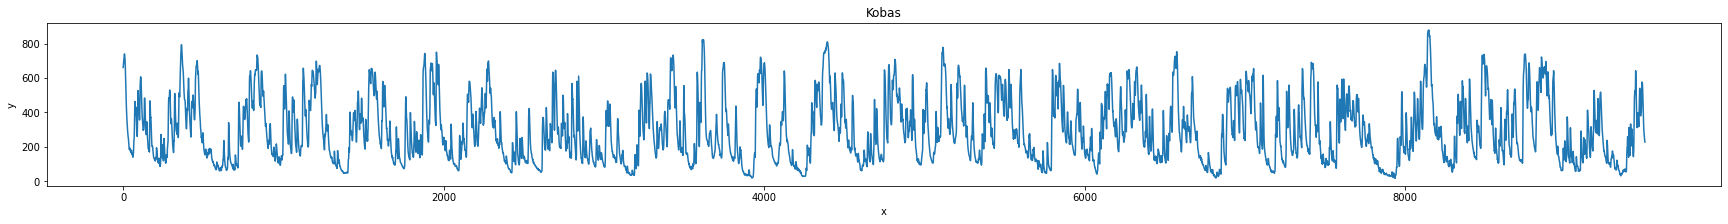

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 
x = np.arange(0, kobas.size, 1)
X = fft(kobas, np.size(x))
xr = ifft(X, np.size(X))

plt.figure(1, [30, 3])
plt.subplot(1,1,1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Kobas")
plt.plot(kobas)
plt.xticks(np.arange(0, 10000, step=2000)) 
plt.yticks(np.arange(0, 1000, step=200))

plt.show()

**5.**	Izračunajte diskretnu Fourierovu transformaciju zadanog vodostaja. Ispišite dobivene vrijednosti. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata.

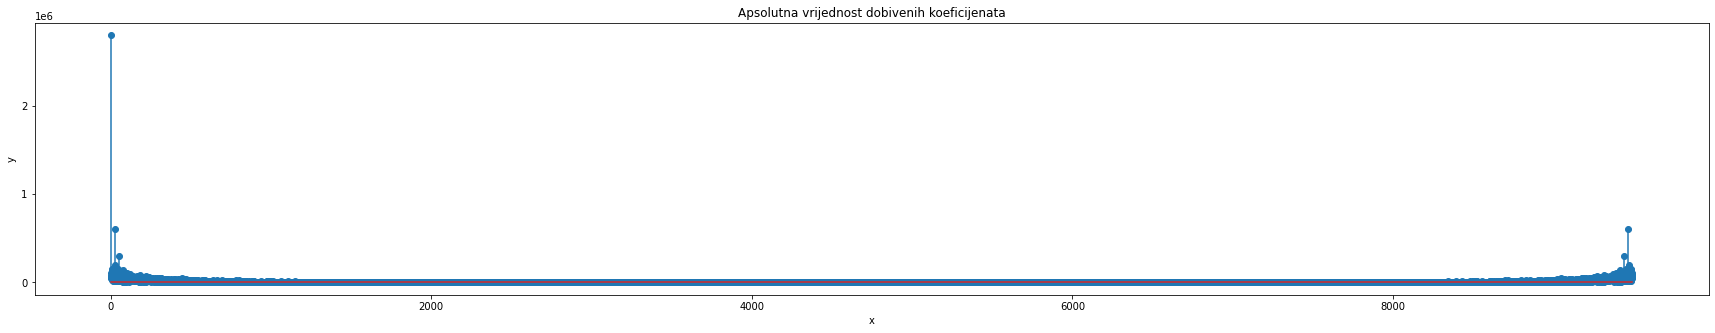

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.

plt.figure(1, [30,5])
plt.subplot(1,1,1)
plt.xlabel('x')
plt.ylabel('y')
plt.stem(abs(X), use_line_collection = True)
plt.title("Apsolutna vrijednost dobivenih koeficijenata")
plt.xticks(np.arange(0, 10000, step=2000))
plt.yticks(np.arange(0, 3*np.power(10, 6), step=1*np.power(10,6)))

plt.show()

**6.**	Izračunajte Fourierovu transformaciju na vremenskom otvoru zadanog vodostaja koristeći pravokutni otvor širine 2 godine. Prikažite rezultat pomoću pcolormesh. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

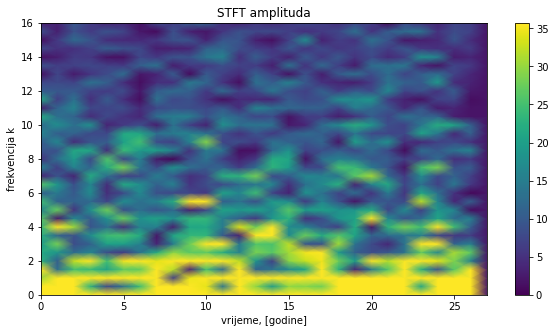

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

T = 365
fs = 365
window = 'boxcar'
f, t, Zxx = signal.stft(kobas, fs, window, nperseg=2*T)

plt.figure(1, [10,5])
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx.max())/10, shading='gouraud')
plt.colorbar()
plt.title('STFT amplituda')
plt.ylabel('frekvencija k')
plt.xlabel('vrijeme, [godine]')
plt.ylim(0, 16)
plt.show()

ODGOVOR: *Ovo je mjesto za odgovor na pitanja iz 6. zadatka.*

U vodostaju su vidljive frekvencije od 0 do otprilike 75. S obzirom da su frekvencije od 16 do 75 bile jedva zamjetne odrezao sam ih iz grafa kako bi one od 0 do 16 bile izraženije. Razdoblje promatranja je od nepunih 26 godina. Najveće amplitude prikazane su žutom bojom, dok su najmanje amplitude prikazane plavom bojom. Amplituda predstavlja vodostaj te se kreće u rasponu od 0 do malo iznad 35. Najveće aplitude imaju frekvenciju između 0 i 2. Što je veća frekvencija amplituda opada. Najveće amplitude prikazane su u razdobljima 0-2, 6-10, 17-22, 24-26 godina. 

**7.**	Upotrijebite drugu širinu otvora (po izboru) i ponovite prethodni zadatak. Ispišite koju širinu ste upotrijebili. Objasnite razlike u dobivenim slikama.

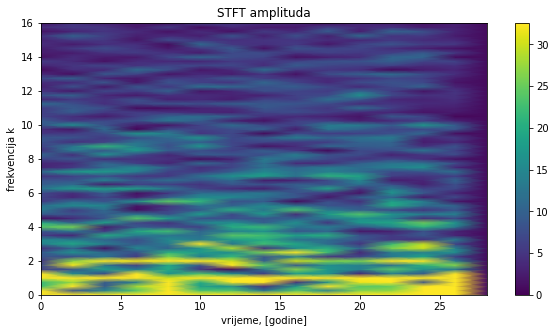

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

T = 365
fs = 365
window = 'boxcar'
f, t, Zxx = signal.stft(kobas, fs, window, nperseg=4*T)

plt.figure(1, [10,5])
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx.max())/10, shading='gouraud')
plt.colorbar()
plt.title('STFT amplituda')
plt.ylabel('frekvencija k')
plt.xlabel('vrijeme, [godine]')
plt.ylim(0, 16)
plt.show()

ODGOVOR: *Ovo je mjesto za odgovor na pitanje iz 7. zadatka.*

Upotrijebio sam širinu od 4 godine. Aplitude prikazane na grafu su manje. Sada se njihova skala kreće od 0 do malo iznad 30, dok je na širini od 2 godine bila od 0 do malo iznad 35. Na grafu je znatno manja količina žute boje nego u prethodnom zadatku te su očitanja o visokim vodostajima vidljivi samo na 8. i 24-26. godini.

**8.**	Ispišite sve obitelji kontinuiranih valića koje se nalaze u PyWavelets biblioteci. Na istoj slici, koristeći subplot naredbu, nacrtajte dvije valićne funkcije po izboru. U naslovu svake slike napišite o kojim valićima se radi.

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


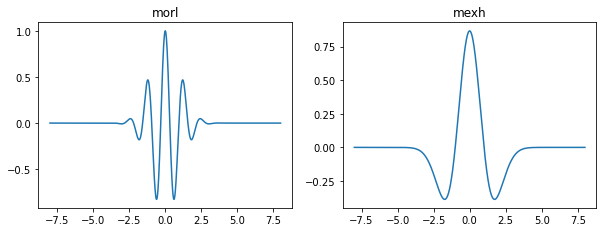

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

print(pywt.wavelist(kind='continuous'))

prvi_valic = 'morl'
drugi_valic = 'mexh'

w1 = pywt.ContinuousWavelet(prvi_valic)
w2 = pywt.ContinuousWavelet(drugi_valic)

psi1, t1 = w1.wavefun(level=10)
psi2, t2 = w2.wavefun(level=10)

plt.figure(1, [10,7.5])
plt.subplot(2,2,1)
plt.plot(t1,psi1)
plt.yticks(np.arange(-0.5, 1.5, step=0.5))
plt.title("morl")

plt.figure(1, [10,7.5])
plt.subplot(2,2,2)
plt.plot(t2,psi2)
plt.yticks(np.arange(-0.25, 1, step=0.25))
plt.title("mexh")

plt.show()

**9.**	Koristeći Morlet valić, odredite kontinuiranu valićnu transformaciju zadanog vodostaja. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

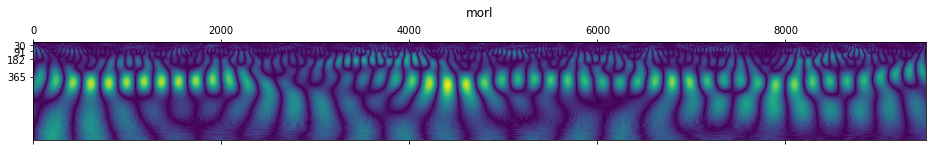

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod. 

valic = 'morl'
w = pywt.ContinuousWavelet(valic)
psi, t = w.wavefun(level=10)

step = 0.7
skala = np.arange(0.1, 2*T, step)

coef, freqs = pywt.cwt(kobas, skala, valic)

plt.matshow(abs(coef))
plt.yticks([T//12, T//4, T//2, T])
plt.title("morl" + "\n")

plt.show()

ODGOVOR: *Ovo je mjesto za odgovor na pitanja iz 9. zadatka.*

U vodostaju su vidljive niže i više frekvencije, s naglaskom na frekvencije 2PI/365 (jedna godina), 2PI/(365/2) (pola godine), 2PI/(365/4) (tri mjeseca), 2PI/(365/12) (jedan mjesec). Niske frekvencije vidljive su između 2000 i 4000 mjerenja. Više frekvencije vidljive su u ostalim razdobljima, s najizraženijima periodima 1983.-1987. i 1993.-1995. 

**10.**	Odgovorite: objasnite razliku u dobivenim rezultatima STFT i CWT.

ODGOVOR: *Ovo je mjesto za odgovor na pitanje iz 10. zadatka.*

Rezultati dobiveni CWT lakši su za iščitavanje te je bolje prikazana vremenska struktura. Kod STFT lakše je vidjeti općeniti trend o visini vodostaja, odnosno radi li se o visokim ili niskim vodostajima. Kod CWT daje se jasniji i precizniji prikaz kako se vodostaj mijenja. Kada je riječ o promatranju frekvencija, tu je lakše gledati rezultate STFT-a. 